In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

In [40]:
df = pd.read_csv('winequality-red (2).csv')

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score , roc_curve

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [46]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [49]:
m = pd.DataFrame(df)

In [50]:
m["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [52]:
m.shape

(1599, 12)

In [54]:
m.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [56]:
m.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [57]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [59]:
m.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

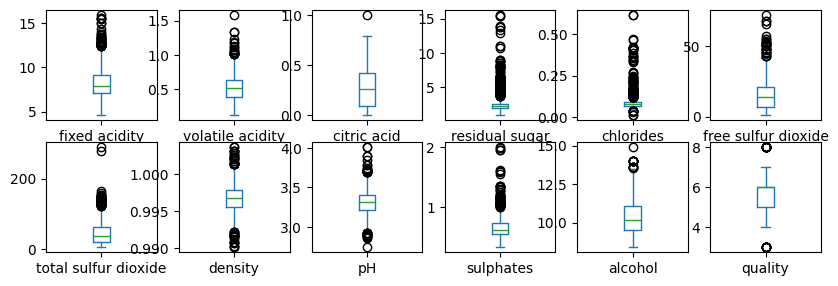

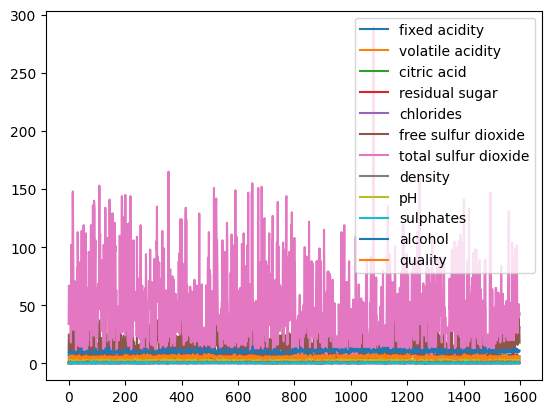

In [62]:
m.plot(kind='box',subplots=True,layout=(6,6),figsize = (10,10))
m.plot()
# outlier detection

In [63]:
from scipy.stats import zscore

In [65]:
m.shape

(1599, 12)

In [66]:
z = np.abs(zscore(m))


In [67]:
theshold=3
print(np.where(z<3))
b=m[(z<3).all(axis = 1)]
# retuns indexs less than 3
# b = boolean value less than 3
# m is likiy 2 d numpy array
# remove outliear 
# theshold 

(array([   0,    0,    0, ..., 1598, 1598, 1598], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))


In [68]:
# z score for standardsation
b.shape

(1451, 12)

<Axes: xlabel='quality', ylabel='count'>

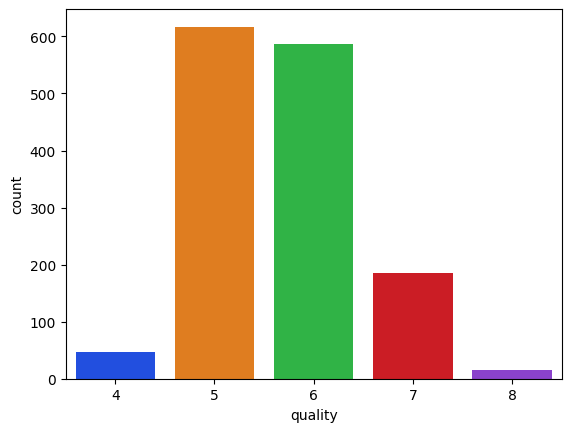

In [69]:
# countplot

sns.countplot(x = 'quality',palette = 'bright',data = b)
# majority is between 5 and 6

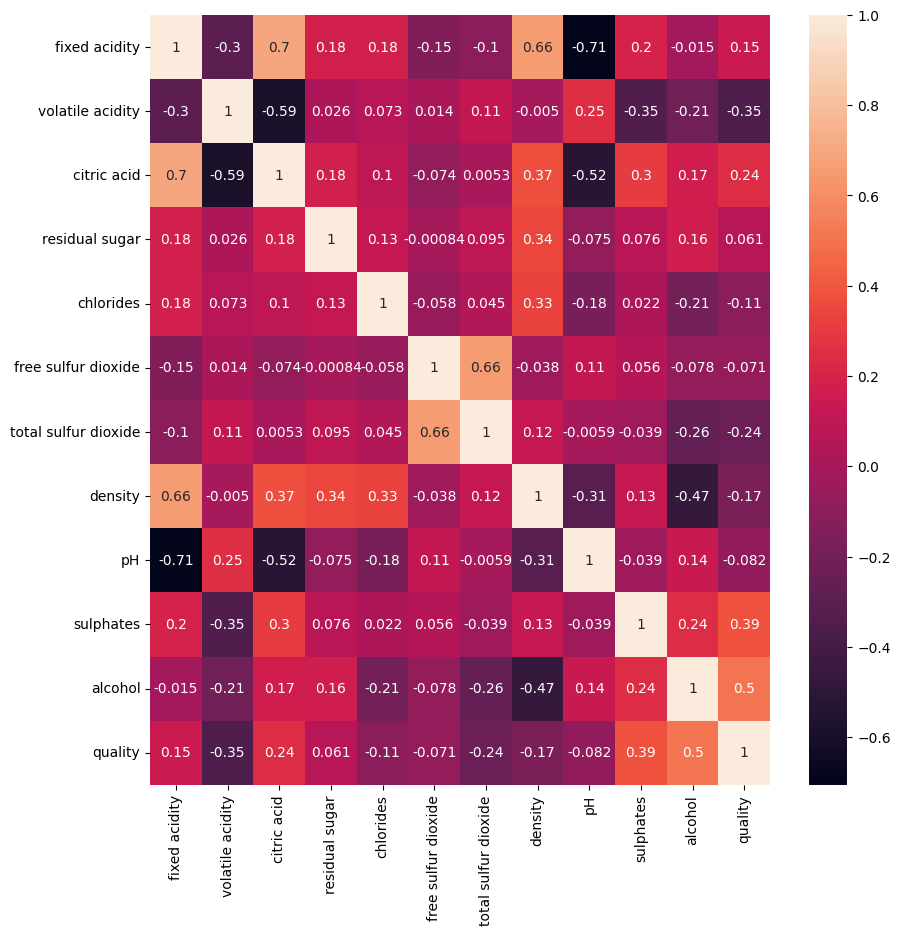

In [74]:
# correlation plot 
corr = b.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [75]:
b["quality"].value_counts()

quality
5    617
6    586
7    185
4     47
8     16
Name: count, dtype: int64

In [76]:
x = b.iloc[:,:-1]
y = b['quality'].apply(lambda y_value:1 if y_value >= 7 else 0)

In [77]:
y.value_counts()

quality
0    1250
1     201
Name: count, dtype: int64

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)


In [79]:
x_train.shape

(1015, 11)

In [80]:
y_train.shape

(1015,)

In [82]:
x_test.shape

(436, 11)

In [83]:
y_test.shape

(436,)

In [84]:
# dtc
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
pre = dtc.predict_proba(x_test)[:,1]
pre

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1.

In [90]:
fpr,tpr,thesholds=roc_curve(y_test,pre)


In [92]:
print('fpr:',fpr,'tpr : ',tpr,'thesholds: ',thesholds)

fpr: [0.         0.08310992 1.        ] tpr :  [0.         0.55555556 1.        ] thesholds:  [inf  1.  0.]


In [93]:
thesholds

array([inf,  1.,  0.])

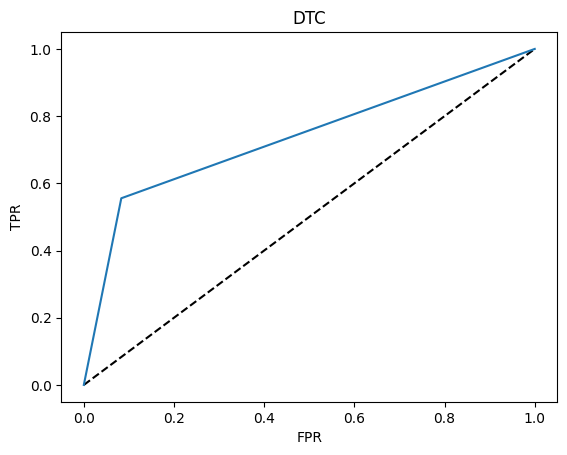

In [95]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='dtc')
plt.title("DTC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [96]:
ac = roc_auc_score(y_test,dtc.predict(x_test))
ac

0.7362228179922549

In [99]:
print("accuracy score of ",accuracy_score(y_test,pre))
print("Classification report ",classification_report(y_test,pre))
print("Confusion matrix : ",confusion_matrix(y_test,pre))


accuracy score of  0.8646788990825688
Classification report                precision    recall  f1-score   support

           0       0.92      0.92      0.92       373
           1       0.53      0.56      0.54        63

    accuracy                           0.86       436
   macro avg       0.73      0.74      0.73       436
weighted avg       0.87      0.86      0.87       436

Confusion matrix :  [[342  31]
 [ 28  35]]


In [106]:
# qualtiy 
def qual(q):
    q=q.reshape(1,-1)
    pro=dtc.predict(q)
    print("predicted value of q is :",pro)
    if pro == 1:
        print("WIne quality is good")
    else:
        print("Wine qualtiy poor")
        

In [107]:
q = np.array([7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.99,0.47,10.0])

In [108]:
qual(q)

predicted value of q is : [1]
WIne quality is good
